# CASE STUDY: DATA EXPLORATORY ANALYSIS FOR CREDIT CARD DATA

In [1]:
# Import the necessary libraries (pandas, numpy)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style= 'ticks')


In [4]:
# Reading the files 

Customer = pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv',usecols= ['Customer','Age','City','Product','Limit','Company','Segment'])
Spend =  pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Case Study 2 - Credit Card Case Study\spend.csv', usecols=['Customer','Month','Type','Amount'])
Repayment =  pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Case Study 2 - Credit Card Case Study\Repayment.csv', usecols= ['Customer','Month','Amount']) 


In [5]:
# details of customer at the time of card issuing by company
Customer.head(3)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


In [6]:
# credit card spend by customer
Spend.head(3)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46


In [7]:
# credit card payment done by the customers
Repayment.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


## Exploratory Data Analysis

In [8]:
print(Customer.shape)
print(Spend.shape)
print(Repayment.shape)

(100, 7)
(1500, 4)
(1523, 3)


### Renaming the Month column of Spend and Repayment to Date

In [9]:
Spend.rename(columns= {'Month': 'Date'}, inplace= True)
Repayment.rename(columns= {'Month': 'Date'}, inplace= True)

In [10]:
Customer.Product.unique()

array(['Gold', 'Silver', 'Platimum'], dtype=object)

In [11]:
corrections = {'Gold':'Gold', 'Silver':'Silver','Platimum': 'Platinum'} # Correct the misspelling
    

# Apply the corrections to the "Product" column using the map function
Customer['Product'] = Customer['Product'].map(corrections)


In [12]:
Customer.Product

0         Gold
1       Silver
2     Platinum
3     Platinum
4     Platinum
        ...   
95      Silver
96    Platinum
97    Platinum
98    Platinum
99      Silver
Name: Product, Length: 100, dtype: object

### checking for dataypes in the dataset

In [13]:
Customer.dtypes

Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [14]:
# here we have to change the datatype of Date column datetime
Spend.dtypes

Customer     object
Date         object
Type         object
Amount      float64
dtype: object

In [15]:
Spend['Date'] = pd.to_datetime(Spend.Date,format ='%d-%b-%y')

In [16]:
Spend['Date'].head()

0   2004-01-12
1   2004-01-03
2   2004-01-15
3   2004-01-25
4   2005-01-17
Name: Date, dtype: datetime64[ns]

In [17]:
Repayment.dtypes

Customer     object
Date         object
Amount      float64
dtype: object

In [18]:
Repayment['Date'] = pd.to_datetime(Repayment.Date,format ='%d-%b-%y')

In [19]:
Repayment['Date'].head()

0   2004-01-12
1   2004-01-03
2   2004-01-15
3   2004-01-25
4   2005-01-17
Name: Date, dtype: datetime64[ns]

### checking for null values in the datasets

In [20]:
Customer.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [21]:
Spend.isnull().sum()

Customer    0
Date        0
Type        0
Amount      0
dtype: int64

In [22]:
Repayment.isnull().sum()

Customer    23
Date        23
Amount      23
dtype: int64

In [23]:
# dropping the null values in Rapayment dataset

Repayment.dropna(inplace= True)

In [24]:
Repayment.isnull().sum()

Customer    0
Date        0
Amount      0
dtype: int64

In [25]:
Repayment

,Customer,Date,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88
...,...,...,...
1495,A67,2005-05-09,55638.77
1496,A68,2006-05-10,319836.49
1497,A69,2006-07-11,247628.45
1498,A70,2005-08-12,454016.51


### checking for duplicates in the data set

In [26]:
# No duplicates present in the dataset

Customer.duplicated().sum()

0

In [27]:
Spend.duplicated().sum()

0

In [28]:
Repayment.duplicated().sum()

0

### Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the customers spend & repayment behavior.
### 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values.


In [29]:
# mean of age column

print('Mean of age column is',Customer.Age.mean())

Mean of age column is 46.49


In [30]:
# replacing age less than 18 with mean of age values

Customer.loc[Customer.Age < 18,'Age'] = Customer.Age.mean() 

In [31]:
# we can see we got an empty series and the age has been replaced by mean age
Customer.loc[Customer.Age<18,'Age']

Series([], Name: Age, dtype: float64)

In [32]:
print('All the customers who have age less than 18 have been replaced by mean of the age column')

All the customers who have age less than 18 have been replaced by mean of the age column


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
### (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [33]:
Customer.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [34]:
Spend.head(2)

,Customer,Date,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13


In [35]:
# In order to get both limit and spend in one table, we need to merge both the table on the basis of Customer col 
# present in both table

customer_spend = pd.merge(left=Customer, right=Spend, on='Customer', how='inner')

In [36]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [37]:
customer_spend.shape

(1500, 10)

In [38]:
# All the customers whose spend amount is more than the limit

customer_spend[customer_spend['Amount']>customer_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-09-03,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,2006-03-30,RENTAL,483886.62
1496,A97,58.0,TRIVANDRUM,Platinum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platinum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platinum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [39]:
# All the customers whose spend amount is more than the limit, replacing it with 50% of customer limit

customer_spend.loc[customer_spend['Amount']>customer_spend['Limit'],'Amount'] = (50*customer_spend['Limit'])/(100)

In [40]:
# we can see there is no customers left, where spend amount is more than the limit
customer_spend[customer_spend['Amount']>customer_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [41]:
Customer.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [42]:
Repayment.head(2)

,Customer,Date,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [43]:
# merging table Customer and Repayment on Customer column

customer_repay = pd.merge(left=Customer, right=Repayment, on='Customer', how='inner')

In [44]:
customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Date,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [45]:
# customers whose repay amount is more than the limit

customer_repay[customer_repay['Amount'] > customer_repay['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Date,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,185955.07
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,412783.34
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,148038.67
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,179144.68
23,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-08-03,381635.66
...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,2006-03-30,462283.02
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1496,A97,58.0,TRIVANDRUM,Platinum,10000.0,C20,Govt,2004-01-12,121874.90
1497,A98,51.0,CALCUTTA,Platinum,10001.0,C21,Normal Salary,2004-01-03,337815.57


In [46]:
# customers whose repay amount is more than the limit, replacing it with limit

customer_repay.loc[customer_repay['Amount'] > customer_repay['Limit'],'Amount'] = customer_repay['Limit']

In [47]:
# so there is no customers left where repayment amount is more than the limit

customer_repay[customer_repay['Amount']>customer_repay['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Date,Amount


### 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?


In [48]:
Customer['Customer'].nunique()

100

In [49]:
print('The number of distinct customers are ', Customer['Customer'].nunique())

The number of distinct customers are  100


### b. How many distinct categories exist?


In [50]:
Customer.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [51]:
# customers with different segments/categories

Customer["Segment"].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

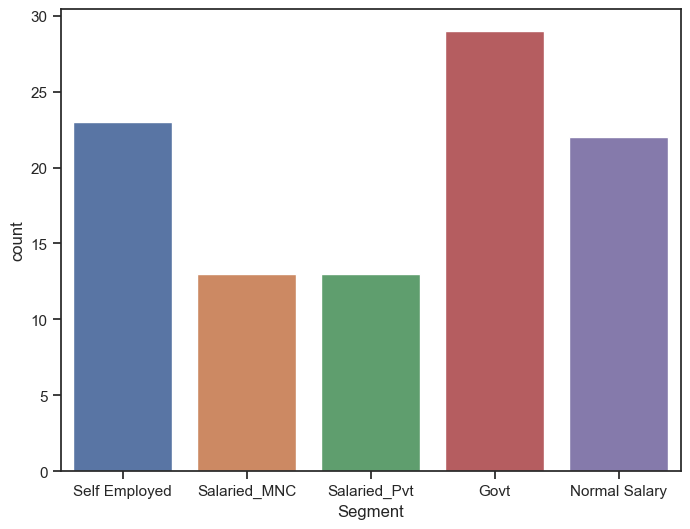

In [52]:
# plotting the graph of different segments

plt.figure(figsize=(8,6))
sns.countplot(data=Customer, x='Segment')
plt.show()

In [53]:
#len(Customer["Segment"].value_counts())   -- 1st method
Customer['Segment'].nunique()   # 2nd method

5

*So there are 5 distinct segments/categories of customers are present as we can see from the countplot also.*

### c. What is the average monthly spend by customers?


In [54]:
Spend.head()

,Customer,Date,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [55]:

Spend.dtypes

Customer            object
Date        datetime64[ns]
Type                object
Amount             float64
dtype: object

In [56]:
# making new column monthly from Month column
Spend['Monthly']= Spend['Date'].apply(lambda x: pd.Timestamp.strftime(x,format= "%B"))

In [57]:
# making new column yearly from Month column
Spend['Yearly'] = Spend['Date'].apply(lambda x: pd.Timestamp.strftime(x, format='%Y'))

In [58]:
Spend.dtypes

Customer            object
Date        datetime64[ns]
Type                object
Amount             float64
Monthly             object
Yearly              object
dtype: object

In [59]:
Spend.head()

,Customer,Date,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [60]:
# average monthly spend by customers, by grouping yearly and monthly
cust_avg_monthly_spend = round(Spend.groupby(by=['Yearly','Monthly'])[['Amount']].mean(),2)

In [61]:
cust_avg_monthly_spend

Amount
Yearly Monthly             
2004   April      235272.04
       February   221215.27
       January    251712.07
       March      232146.12
       May        217539.24
       November   270486.40
       September  310923.38
2005   April      252181.33
       August     233734.63
       December   147503.06
       February   229802.28
       January    292741.37
       July       229116.66
       June       262688.11
       May        245696.52
       November   286143.32
       October    194568.64
       September  188666.20
2006   April      232468.97
       August     240699.72
       December   270470.98
       February   253858.26
       January    282058.01
       July       287505.10
       June       177252.39
       March      247166.08
       May        236162.74
       November   182841.29
       October    236136.34
       September  158520.09

### d. What is the average monthly repayment by customers?


In [62]:
Repayment.head()

,Customer,Date,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [63]:
Repayment.dtypes

Customer            object
Date        datetime64[ns]
Amount             float64
dtype: object

In [64]:
# making new column monthly and Yearly from date column
Repayment['Monthly'] = Repayment['Date'].apply(lambda x: pd.Timestamp.strftime(x,format="%B"))
Repayment['Yearly'] = Repayment['Date'].apply(lambda x: pd.Timestamp.strftime(x,format="%Y"))

In [65]:
Repayment.dtypes

Customer            object
Date        datetime64[ns]
Amount             float64
Monthly             object
Yearly              object
dtype: object

In [66]:
Repayment.head(2)

,Customer,Date,Amount,Monthly,Yearly
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004


In [67]:
cust_avg_monthly_repay = round(Repayment.groupby(by= ['Yearly','Monthly'])[['Amount']].mean(),2)

In [68]:
cust_avg_monthly_repay

Amount
Yearly Monthly             
2004   April      259141.68
       February   256702.63
       January    243489.65
       March      252585.28
       May        226162.72
       November   209592.24
       September  184487.85
2005   April      212688.63
       August     264430.92
       December   320379.34
       February   238829.27
       January    240548.10
       July       239871.48
       June       210199.82
       May        263207.37
       November   256695.12
       October    219849.96
       September  247700.17
2006   April      275472.25
       August     224143.99
       December   252736.57
       February   284489.57
       January    293475.39
       July       257936.38
       June       251990.45
       March      240851.27
       May        256920.88
       November   199399.20
       October    260765.48
       September  262533.88

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [69]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [70]:
Repayment.head()

,Customer,Date,Amount,Monthly,Yearly
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004
2,A1,2004-01-15,259490.06,January,2004
3,A1,2004-01-25,437555.12,January,2004
4,A1,2005-01-17,165972.88,January,2005


In [71]:
# To get the repayment and spend of customer merge customer_spend and repay table

customer_spend_repay = pd.merge(left=customer_spend, right=Repayment, on=['Customer','Date'], how='inner')

In [72]:
customer_spend_repay.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount_x,Amount_y,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,350446.82,January,2004


In [73]:
# renaming columns

customer_spend_repay.rename(columns={'Amount_x':'Spend_Amount','Amount_y':'Repay_Amount'}, inplace= True)

In [74]:
customer_spend_repay.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Spend_Amount,Repay_Amount,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,350446.82,January,2004


In [75]:
credit_card_profit = customer_spend_repay.groupby(by=['Yearly','Monthly'])[['Spend_Amount','Repay_Amount']].sum()

In [76]:
credit_card_profit.head()

Spend_Amount  Repay_Amount
Yearly Monthly                             
2004   April        676643.02    1801933.80
       February    1613276.92    2440340.81
       January    54964451.63   90130133.46
       March       1071905.01    1385447.54
       May          613440.97    2179617.48

In [77]:
# calculating Monthly Profit = Monthly repayment – Monthly spend.

credit_card_profit['Monthly_Profit'] = credit_card_profit['Repay_Amount'] - credit_card_profit['Spend_Amount']

In [78]:
credit_card_profit.head(5)

Spend_Amount  Repay_Amount  Monthly_Profit
Yearly Monthly                                             
2004   April        676643.02    1801933.80      1125290.78
       February    1613276.92    2440340.81       827063.89
       January    54964451.63   90130133.46     35165681.83
       March       1071905.01    1385447.54       313542.53
       May          613440.97    2179617.48      1566176.51

In [79]:
credit_card_profit_new = credit_card_profit[credit_card_profit['Monthly_Profit']>0]

In [80]:
# profit at monthly rate of interest 2.9%
credit_card_profit_new['profit_as_interest'] = (credit_card_profit_new['Monthly_Profit']*2.9)/100

C:\Users\91896\AppData\Local\Temp\ipykernel_27448\316425692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_profit_new['profit_as_interest'] = (credit_card_profit_new['Monthly_Profit']*2.9)/100


In [81]:
credit_card_profit_new

Spend_Amount  Repay_Amount  Monthly_Profit  \
Yearly Monthly                                                 
2004   April         676643.02    1801933.80      1125290.78   
       February     1613276.92    2440340.81       827063.89   
       January     54964451.63   90130133.46     35165681.83   
       March        1071905.01    1385447.54       313542.53   
       May           613440.97    2179617.48      1566176.51   
       November      572731.66    1107455.00       534723.34   
2005   April         937391.46    2677783.73      1740392.27   
       August       1128247.40    2356578.55      1228331.15   
       December      892073.15    1993057.32      1100984.17   
       February    19857706.36   29032454.09      9174747.73   
       January      3153534.09    3490382.91       336848.82   
       July          347293.80    1516706.01      1169412.21   
       June         2779376.13    4523946.92      1744570.79   
       May          8352824.26   14092297.62      5739473.36   
       November     2337536.73    3757882.79      1420346.06   
       October       570860.46    1383682.65       812822.19   
       September     663419.22    1128231.04       464811.82   
2006   April        3506096.05    8561217.81      5055121.76   
       August        918882.48     922682.18         3799.70   
       February     2744167.15    4224494.12      1480326.97   
       January      1270011.03    1832436.44       562425.41   
       July         1494112.19    2138597.55       644485.36   
       June          423460.22    1206400.69       782940.47   
       March       15387180.98   24727574.88      9340393.90   
       May          2246785.99    6233206.28      3986420.29   
       November     1649658.67    2429426.80       779768.13   
       October       989641.47    1040526.27        50884.80   
       September     733211.92    1276369.16       543157.24   

                  profit_as_interest  
Yearly Monthly                        
2004   April            3.263343e+04  
       February         2.398485e+04  
       January          1.019805e+06  
       March            9.092733e+03  
       May              4.541912e+04  
       November         1.550698e+04  
2005   April            5.047138e+04  
       August           3.562160e+04  
       December         3.192854e+04  
       February         2.660677e+05  
       January          9.768616e+03  
       July             3.391295e+04  
       June             5.059255e+04  
       May              1.664447e+05  
       November         4.119004e+04  
       October          2.357184e+04  
       September        1.347954e+04  
2006   April            1.465985e+05  
       August           1.101913e+02  
       February         4.292948e+04  
       January          1.631034e+04  
       July             1.869008e+04  
       June             2.270527e+04  
       March            2.708714e+05  
       May              1.156062e+05  
       November         2.261328e+04  
       October          1.475659e+03  
       September        1.575156e+04

### f. What are the top 5 product types?

In [82]:
Spend.head(3)

,Customer,Date,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004


In [83]:
# Top 5 products in which customers are spending

Spend.Type.value_counts().head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

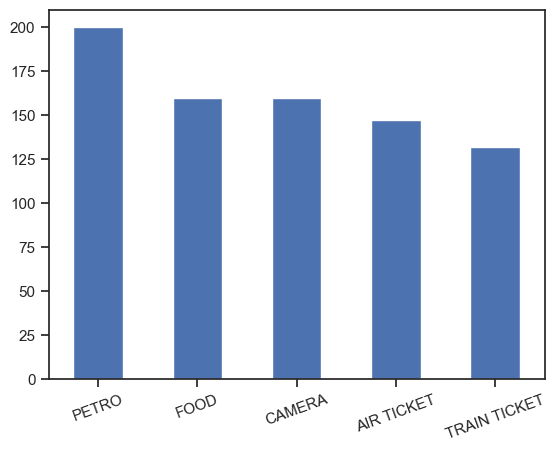

In [84]:
Spend.Type.value_counts().head(5).plot(kind='bar')
plt.xticks(rotation=20)
plt.show()

*The top 5 products where customers are spending is Petro, Food, Camera, Air Ticket, Train Ticket.*

### g. Which city is having maximum spend?

In [84]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [85]:
# grouping the data by city, and finding the amount spend by each city and sorting the values in decreasing order

city_spend = customer_spend.groupby(by= ['City'])[['Amount']].sum().sort_values(by= 'Amount',ascending= False)

In [86]:
city_spend

,Amount
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65
TRIVANDRUM,15337155.87
PATNA,15260586.97
DELHI,10918286.54


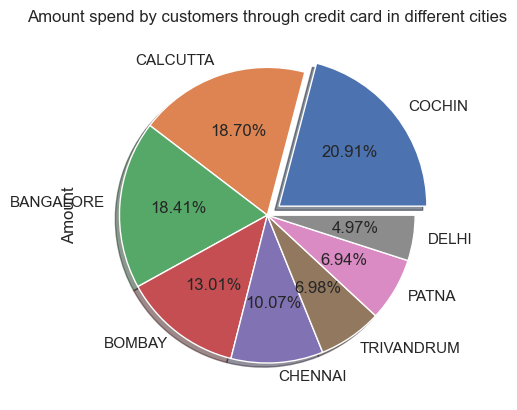

In [87]:
# plotting the graph of above reporting table

city_spend.plot(kind='pie',y='Amount',autopct='%1.2f%%', shadow = True,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0], legend= False)
plt.title('Amount spend by customers through credit card in different cities')
plt.show()

*From the above pie chart we can see that Cochin is having maximum spend through credit cards, whereas Bangalore and Calcutta is also having  almost similar spend in terms of using credit card.*

### h. Which age group is spending more money?

In [88]:
customer_spend.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46


In [89]:
# creating a new column Age_cat with different age buckets
customer_spend['Age_cat'] = pd.cut(customer_spend['Age'], bins=[18,28,38,48,58,68,78,88] ,labels =['18-28','28-38','38-48','48-58','58-68','68-78','78-88'])

In [90]:
customer_spend.Age_cat.value_counts()

18-28    329
38-48    285
48-58    275
28-38    254
68-78    170
58-68    169
78-88     18
Name: Age_cat, dtype: int64

In [91]:
customer_spend.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount,Age_cat
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,68-78
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,68-78
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,68-78


In [92]:
# grouping data by age group, and finding the amount spend by each group and arranging it in descending order

age_spend = customer_spend.groupby(by='Age_cat')[['Amount']].sum().sort_values(by='Amount', ascending = False)

In [93]:
age_spend

,Amount
Age_cat,
38-48,52350765.92
18-28,44458290.95
28-38,40669446.09
48-58,32043137.38
68-78,28731480.99
58-68,20623443.21
78-88,904520.69


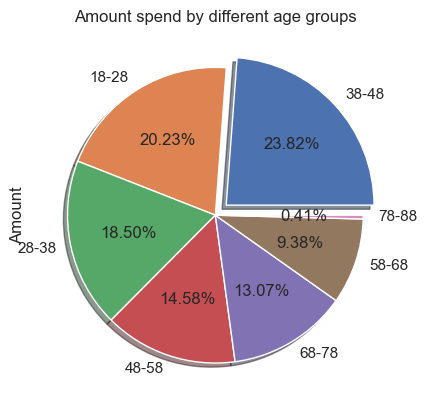

In [94]:
# plotting the graph of above reporting table

age_spend.plot(kind='pie', y='Amount', autopct='%1.2f%%', shadow= True, explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0] ,legend= False)
plt.title('Amount spend by different age groups')
plt.show()

*From the above pie chart we can say that age group 38-48 is spending more money using cards which is around 24% of their contribution, also the age group 18-20 have spend around 20.23% and age group 28-38 have their contribution of around 18.5% as the 3rd highest spend amoung different age groups.*

### i. Who are the top 10 customers in terms of repayment?

In [96]:
customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Date,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [97]:
# grouping by customer and finding top 10 customers

customer_repay.groupby(by='Customer')[['Amount']].sum().sort_values(by='Amount',ascending= False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


*The above customers are those customers who have made payments of their credit card bills.*

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [87]:
customer_spend.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46


In [88]:
# create new column year in customer_spend df

customer_spend['Year'] = customer_spend['Date'].apply(lambda x: pd.Timestamp.strftime(x, format='%Y'))

In [89]:
customer_spend.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,2004


In [98]:
customer_spend_pivot = customer_spend.pivot_table(index=['City','Year'], columns='Product', aggfunc='sum', values='Amount')

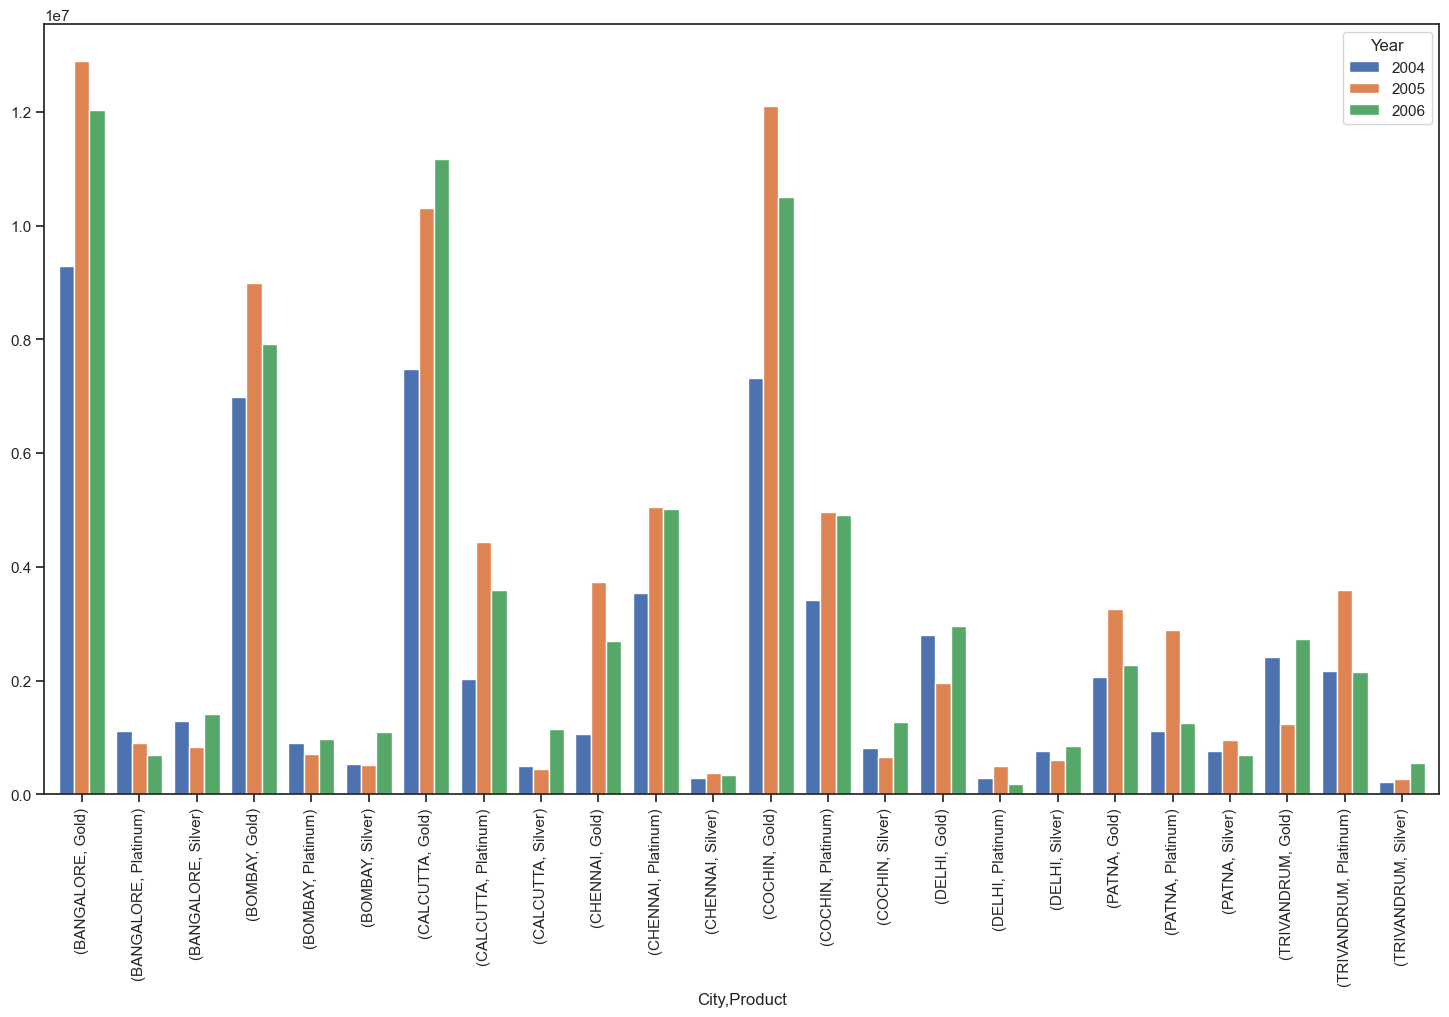

In [99]:
### just tried this after submitting by changing the values in index nd columns

customer_spend.pivot_table(index=['City','Product'], columns='Year', aggfunc='sum', values='Amount').plot(kind='bar',figsize = (18,10), width=0.8)
plt.show()

*From all the 3 products - Gold, Silver and Platinum - the highest purchases are for Gold.*

*Also from all the years Gold purchasing is more in the year 2005.*

*From the above chart we can infer that among all the cities, Bangalore and Cochin is having same trends for Gold purchase for every consecutive years that means, from 2004 to 2005 it gradually increased and then decreased in 2006.*

*For Bombay also it is follwing the same tend in purchasing of Gold as in Cohin and Bangalore.*

*The decreasing trend of gold purchases between the year 2005-06, is the point of focus and one should find out the possible reason for this, and make some strategies to improve the customer aquisition.* 

*But for Calcutta we can see that the Gold purchasing trends are gradually increasing in almost all the years. So the marketing team should make strategies on giving some offers and cashback to the people who are purchasing Gold.*

*In Chennai, there is a trend of purchasing Platinum among the 3 products, also the purchasing has increased in every consecutive years. So there one can focus on selling Platinum products with different varieties and options by keeping in view peoples demand.*







In [100]:
customer_spend_pivot.head()

Product                Gold    Platinum      Silver
City      Year                                     
BANGALORE 2004   9289878.54  1112732.30  1291852.58
          2005  12892362.99   912284.97   830612.34
          2006  12030611.09   685831.27  1415480.94
BOMBAY    2004   6987853.53   897264.94   532089.03
          2005   8983018.28   711804.94   508988.54

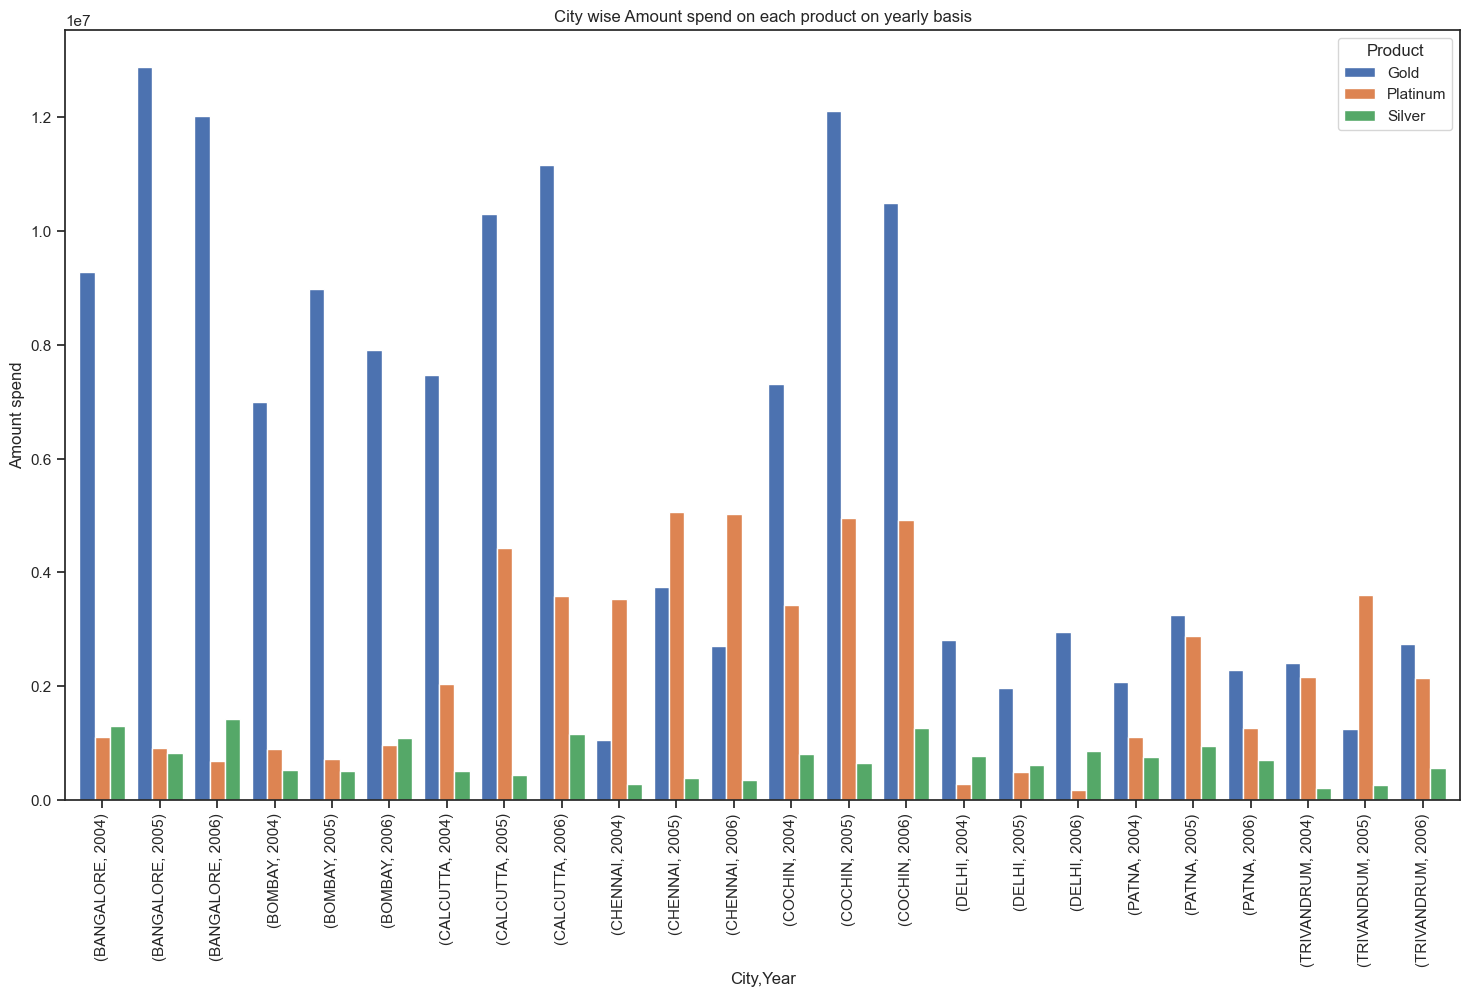

In [106]:
customer_spend_pivot.plot(kind='bar', figsize = (18,10), width=0.8)
plt.title('City wise Amount spend on each product on yearly basis')
plt.ylabel('Amount spend')
plt.show()

### 4. Create graphs for
### a. Monthly comparison of total spends, city wise

In [102]:
customer_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004


In [103]:
customer_spend['Monthly'] = customer_spend['Date'].apply(lambda x: pd.Timestamp.strftime(x,format="%B"))

In [104]:
customer_spend.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,2004,January


In [106]:
# grouping the data based on monthly and city columns

customer_spend.groupby(by= ['Monthly','City'])[['Amount']].sum().reset_index()

,Monthly,City,Amount
0,April,BANGALORE,4207980.48
1,April,BOMBAY,1873785.01
2,April,CALCUTTA,3457507.95
3,April,CHENNAI,2518656.99
4,April,COCHIN,3882744.94
...,...,...,...
91,September,CHENNAI,745759.40
92,September,COCHIN,1382242.90
93,September,DELHI,50001.00
94,September,PATNA,70329.95


In [806]:
city_wise_monthly_spend = customer_spend.pivot_table(index='City', columns='Monthly', aggfunc='sum', values='Amount')

In [807]:
city_wise_monthly_spend.head()

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90


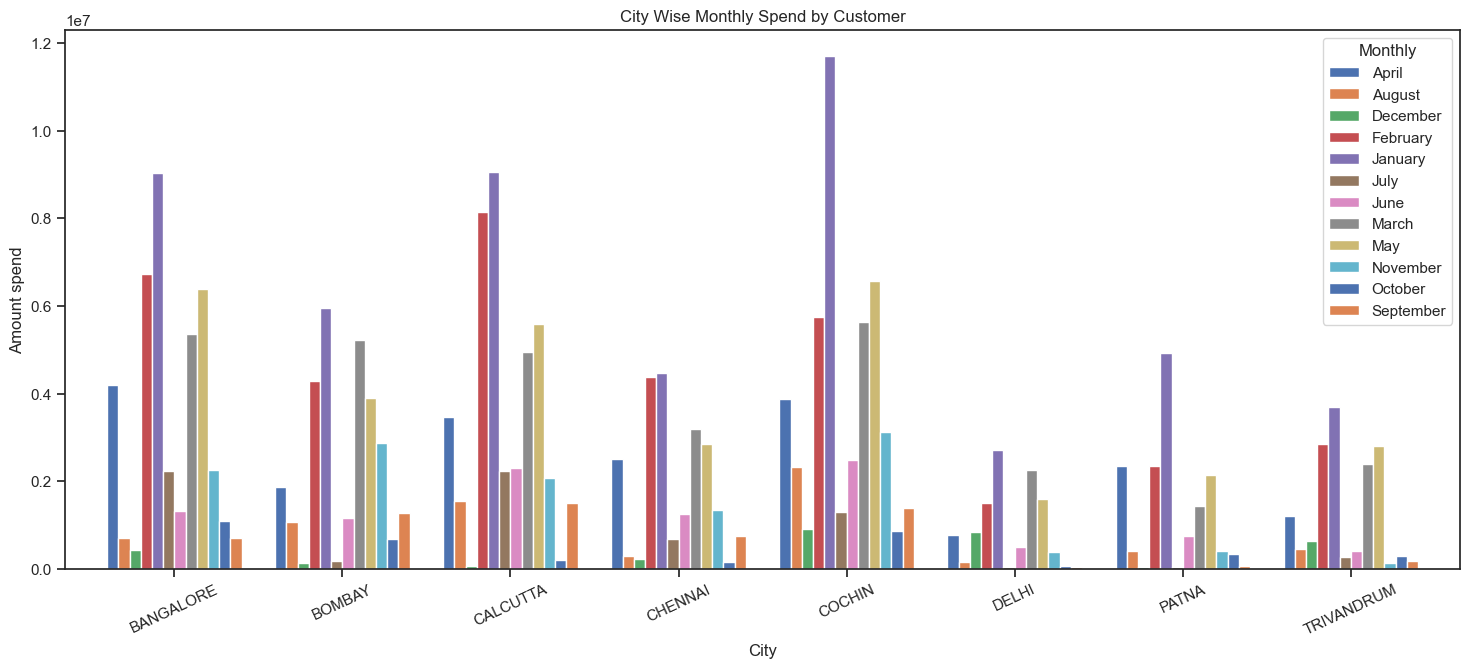

In [808]:
city_wise_monthly_spend.plot(kind='bar',figsize=(18,7), width=0.8)
plt.title('City Wise Monthly Spend by Customer')
plt.xticks(rotation = 25)
plt.ylabel('Amount spend')
plt.show()

*Among all the months customers are spending more in January.*

*Among all the cities in Bangalore, Bombay, Calcutta, Chochin people are spending the most in the month of January, this is may be due the end of an year, and most of the e-platform run clearance sale on their platform, and also give lots of discount and offers for their year end sale, so that they can acquire lots and lots of potential customer.*

### b. Comparison of yearly spend on air tickets

In [809]:
customer_spend.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount,Age_cat,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,68-78,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,68-78,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,68-78,2004,January


In [810]:
air_ticket = customer_spend[customer_spend['Type']== 'AIR TICKET']

In [811]:
yearly_air = air_ticket.groupby(by='Year')[['Amount']].sum()
yearly_air

,Amount
Year,
2004,4357225.35
2005,10550152.21
2006,5248469.56


In [812]:
yearly_air.index

Index(['2004', '2005', '2006'], dtype='object', name='Year')

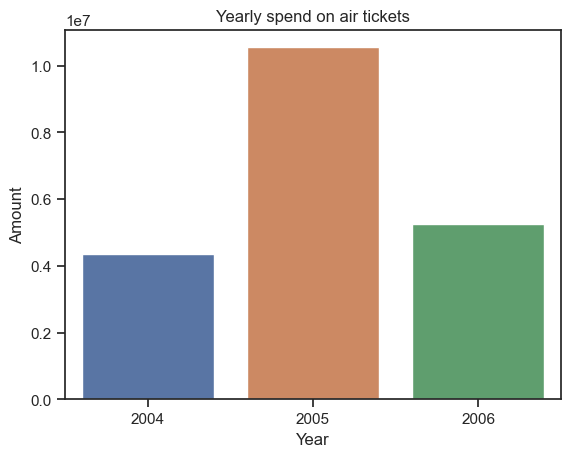

In [813]:
sns.barplot(data= yearly_air, x= yearly_air.index , y='Amount')
plt.title('Yearly spend on air tickets')
plt.show()

*In 2005 the spend on air tickets is high.*

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [107]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Date,Type,Amount,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,2004,January
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,2004,January
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,2005,January


In [120]:
#creating pivot table based on "Monthly" and "Product" columns
product_wise_spend = customer_spend.pivot_table(index='Product', columns='Monthly', aggfunc='sum', values='Amount')

In [121]:
product_wise_spend

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platinum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


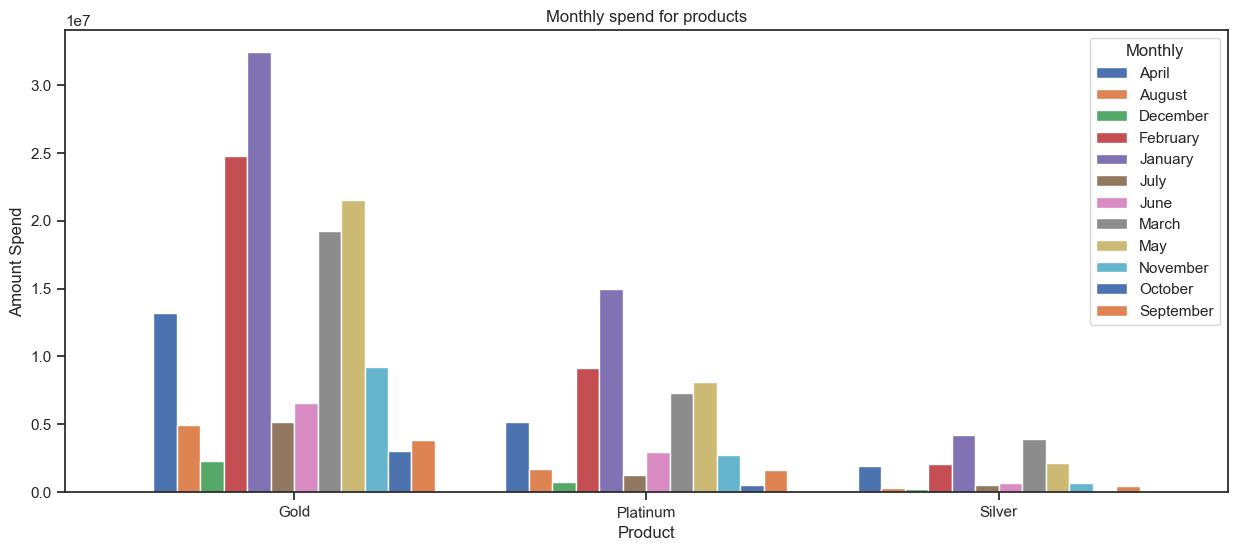

In [110]:
product_wise_spend.plot(kind='bar', figsize=(15,6), width=0.8)
plt.title('Monthly spend for products')
plt.xticks(rotation=1)
plt.ylabel('Amount Spend')
plt.show()

*So we can see that sales are high for all the product in the months :-*

*January, February, March, April, May*

*Among all these months sales are very high in January*

### 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers

In [818]:
customer_repay.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Date,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06


In [124]:
# adding month and year column in df

customer_repay['Monthly'] = customer_repay['Date'].apply(lambda x: pd.Timestamp.strftime(x, format='%B'))
customer_repay['Yearly'] = customer_repay['Date'].apply(lambda x: pd.Timestamp.strftime(x, format='%Y'))

In [125]:
customer_repay.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Date,Amount,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,January,2004


In [126]:

def summary(product,timeperiod):
    print('Please provide input for product and timeperiod')
    
    if (product.lower()=='gold' and timeperiod.lower()=='monthly'):
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum', values='Amount')
        result= pivot.loc[('Gold',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM']),:]
        
    elif(product.lower()=='gold' and timeperiod.lower()=='yearly'):
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly', aggfunc='sum', values='Amount')
        result= pivot.loc[('Gold',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM']),:]
        
    elif(product.lower()=='silver' and timeperiod.lower()=='monthly'):
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly', aggfunc='sum', values='Amount')
        result= pivot.loc[('Silver',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM']),:]
        
    elif(product.lower()=='silver' and timeperiod.lower()=='yearly'):
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly', aggfunc='sum', values='Amount')
        result= pivot.loc[('Silver',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM']),:]
        
    elif(product.lower()=='platinum' and timeperiod.lower()=='monthly'):
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly', aggfunc='sum', values='Amount')
        result= pivot.loc[('Platinum',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM']),:]
        
    elif(product.lower()=='platinum' and timeperiod.lower()=='yearly'):
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly', aggfunc='sum', values='Amount')
        result= pivot.loc[('Platinum',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM']),:]
        
    return result
        

In [127]:
summary('Gold','Monthly')

Please provide input for product and timeperiod


Monthly                           April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   

Monthly                         January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        2407806.29   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        CALCUTTA   A10       1091589.54   358194.65        Na

In [128]:
summary('Gold','Yearly')

Please provide input for product and timeperiod


Yearly                             2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        2359797.84  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A14       2770261.30  2491981.61  2681025.72
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
                   A63        788855.60         NaN   211117.12
                   A81              NaN         NaN   207780.32
                   A88              NaN         NaN   146821.30
                   A92              NaN         NaN   459105.69
        CALCUTTA   A10        892190.53  1246843.93  1556613.06
                   A15       1051502.61  1720768.79  2783141.43
                   A29       1376793.94  1706779.22  3434298.00
                   A31        407599.13  1448641.71  1527798.41
                   A60       2890721.81  3742856.10  3242712.83
                   A89              NaN         NaN   497237.97
        COCHIN     A11        958556.39  2045470.88  2306906.76
                   A16       1122211.16  1226247.16  1911369.63
                   A32        344312.67   696673.46  1517308.65
                   A45       2557947.39  4042447.57  1847939.91
                   A61       2518154.95  4276860.55  3744127.41
                   A65        468922.60   230667.34         NaN
                   A90              NaN         NaN   109931.32
                   A94        153465.89         NaN         NaN
        BOMBAY     A12       2339080.90  2877588.30  3118090.96
                   A17       1425448.02   731143.83  3127783.14
                   A42       3045914.71  3125758.43  1443787.72
                   A62       1744114.25  1541617.21  1684085.69
                   A91              NaN         NaN   247781.00
        DELHI      A44       2149383.50  4165317.77  1430028.85
                   A64              NaN         NaN   323229.09
                   A82              NaN         NaN   342200.74
                   A93        342326.14         NaN         NaN
        PATNA      A26       1490427.84  2433837.95  3330421.30
                   A66        477039.78         NaN   113094.58
                   A95        369405.96         NaN         NaN
        CHENNAI    A27       1842823.04  2782591.71  2387485.81
                   A67         67845.60    55638.77         NaN
        TRIVANDRUM A28        965108.49  2827009.82  3376614.65

In [824]:
summary('Silver','Monthly')

Please provide input for product and timeperiod


Monthly                          April     August   December   February  \
Product City       Customer                                               
Silver  BANGALORE  A18       100000.00  100000.00        NaN   38296.41   
                   A23       405083.59  100001.00        NaN  472921.32   
                   A59        16652.72        NaN        NaN  200006.00   
                   A72             NaN        NaN        NaN  100000.00   
                   A76             NaN        NaN        NaN  265619.05   
                   A77             NaN        NaN        NaN    3159.62   
        CALCUTTA   A2        200000.00  100000.00        NaN  300000.00   
                   A58       200004.00        NaN        NaN  191585.97   
                   A73             NaN        NaN        NaN  100001.00   
                   A78             NaN        NaN        NaN        NaN   
                   A87             NaN        NaN        NaN        NaN   
        COCHIN     A100            NaN        NaN        NaN        NaN   
                   A25       300009.00    1168.46        NaN  236157.25   
                   A7              NaN        NaN  100001.00  100001.00   
                   A74             NaN        NaN        NaN  100002.00   
                   A79             NaN        NaN        NaN        NaN   
        BOMBAY     A22       392140.92  100000.00        NaN  349814.89   
                   A75             NaN        NaN        NaN  100003.00   
                   A80             NaN        NaN        NaN        NaN   
        DELHI      A24       222060.59  100002.00  100002.00  286593.13   
                   A6              NaN        NaN   27398.18  100000.00   
        PATNA      A46       327793.48        NaN        NaN  544231.79   
                   A8        100002.00        NaN        NaN  300006.00   
                   A84             NaN        NaN        NaN        NaN   
        CHENNAI    A85             NaN        NaN        NaN        NaN   
                   A9         43323.90        NaN        NaN  266926.41   
                   A96             NaN        NaN        NaN        NaN   
        TRIVANDRUM A57       177378.57        NaN  100001.00  200002.00   
                   A68             NaN        NaN        NaN        NaN   
                   A86             NaN        NaN        NaN        NaN   

Monthly                        January      July       June      March  \
Product City       Customer                                              
Silver  BANGALORE  A18       391592.71       NaN  200000.00  600000.00   
                   A23       459884.12  100001.0        NaN  100001.00   
                   A59       476551.50  100003.0  110585.36  400012.00   
                   A72             NaN       NaN        NaN        NaN   
                   A76             NaN       NaN        NaN        NaN   
                   A77             NaN       NaN        NaN        NaN   
        CALCUTTA   A2        200000.00       NaN        NaN        NaN   
                   A58       333811.62       NaN  100002.00  408754.94   
                   A73             NaN       NaN        NaN        NaN   
                   A78             NaN       NaN        NaN   55344.81   
                   A87             NaN       NaN        NaN  100003.00   
        COCHIN     A100       69551.19       NaN        NaN        NaN   
                   A25       586332.08  100003.0        NaN  300009.00   
                   A7        594009.28       NaN        NaN  329246.84   
                   A74             NaN       NaN        NaN        NaN   
                   A79             NaN       NaN        NaN  193230.31   
        BOMBAY     A22       900000.00  100000.0  100000.00  253130.91   
                   A75             NaN       NaN        NaN        NaN   
                   A80             NaN       NaN        NaN  481205.64   
        DELHI      A24       484643.62  10000

In [832]:
summary('Silver','Yearly')

Please provide input for product and timeperiod


Yearly                             2004        2005        2006
Product City       Customer                                    
Silver  BANGALORE  A18        491592.71   638296.41   700000.00
                   A23        664965.71  1000010.00   872925.32
                   A59        676557.50   427247.08   600018.00
                   A72        100000.00         NaN         NaN
                   A76              NaN   265619.05         NaN
                   A77              NaN         NaN     3159.62
        CALCUTTA   A2         400000.00   410274.00   200000.00
                   A58        533815.62   540173.85   411640.17
                   A73              NaN   100001.00         NaN
                   A78              NaN         NaN    55344.81
                   A87              NaN         NaN   100003.00
        COCHIN     A100        69551.19         NaN         NaN
                   A25        786338.08   611555.69  1000030.00
                   A7         500005.00   422177.27   608997.87
                   A74              NaN   100002.00         NaN
                   A79              NaN         NaN   193230.31
        BOMBAY     A22        953419.47  1141542.81   945271.83
                   A75              NaN   100003.00         NaN
                   A80              NaN         NaN   481205.64
        DELHI      A24        397014.53  1184870.98   711068.52
                   A6         548574.15   427398.18   507280.51
        PATNA      A46        713614.32  1116730.89   839228.07
                   A8         800016.00   400008.00   531812.40
                   A84              NaN         NaN   100000.00
        CHENNAI    A85              NaN         NaN   100001.00
                   A9         380193.34   500015.00   697845.29
                   A96        100000.00         NaN         NaN
        TRIVANDRUM A57       1000010.00   200002.00   655926.99
                   A68        100000.00         NaN   100000.00
                   A86              NaN         NaN   100002.00

In [831]:
summary('Platinum','Monthly')

Please provide input for product and timeperiod


Monthly                            April     August   December    February  \
Product  City       Customer                                                 
Platinum BANGALORE  A19         30000.00        NaN   10000.00    10000.00   
                    A37        255805.86  100003.00  100003.00   404735.41   
                    A5           7276.60        NaN        NaN    10002.00   
                    A52        200004.00  235509.11        NaN   234334.70   
         CALCUTTA   A20         40004.00   10001.00        NaN    20002.00   
                    A34        100000.00  200000.00        NaN   198933.36   
                    A40              NaN  488742.81  169786.15   937643.24   
                    A49         30006.00   10002.00   10002.00    70014.00   
                    A69              NaN        NaN        NaN         NaN   
                    A98              NaN        NaN        NaN         NaN   
                    A99              NaN        NaN        NaN         NaN   
         COCHIN     A21         40008.00   30006.00   10002.00    50010.00   
                    A3          20000.00        NaN        NaN    30000.00   
                    A35        200002.00  130191.67        NaN   300003.00   
                    A41        147383.00    6865.68        NaN   509624.20   
                    A50        100000.00  100000.00        NaN   229753.02   
                    A54       1025491.68        NaN  215719.14  1149119.64   
                    A83              NaN        NaN        NaN         NaN   
         BOMBAY     A33              NaN   10002.00        NaN    30006.00   
                    A36        511685.20  117379.12  100002.00   427759.59   
                    A4          10001.00        NaN   10001.00    20002.00   
                    A51        100001.00        NaN        NaN   206147.92   
                    A70              NaN   10001.00        NaN    10001.00   
                    A71              NaN        NaN        NaN    10002.00   
         DELHI      A53        300009.00   50308.75  100003.00   279929.09   
         PATNA      A55        619774.41        NaN        NaN  1124130.33   
         CHENNAI    A38        369151.51        NaN  492660.82  1365681.76   
                    A47         50000.00        NaN        NaN    80000.00   
                    A56        770261.09        NaN  162103.09   413912.92   
         TRIVANDRUM A39        472407.74        NaN  278687.47  1212860.65   
                    A48         50005.00        NaN        NaN    70007.00   
                    A97              NaN        NaN        NaN         NaN   

Monthly                          January       July       June       March  \
Product  City       Customer                                                 
Platinum BANGALORE  A19         50000.00   10000.00   10000.00    40000.00   
                    A37        500008.58        NaN  200006.00   200006.00   
                    A5          60012.00        NaN        NaN    30006.00   
                    A52        263853.18  100002.00        NaN   300006.00   
         CALCUTTA   A20         50005.00   30003.00        NaN    30003.00   
                    A34              NaN  148053.83  100000.00   128854.14   
                    A40       1749083.51  242107.49        NaN  1176947.70   
                    A49         50010.00   10002.00   30006.00    30006.00   
                    A69         10000.00   10000.00        NaN         NaN   
                    A98         10001.00        NaN        NaN         NaN   
                    A99         10002.00        NaN        NaN         NaN   
         COCHIN     A21         80016.00   10002.00   20004.00    30006.00   
                    A3          20000.00        NaN        NaN         NaN   
                    A35              NaN  200002.00        NaN   100001.00   
                    A41       2089998.54        NaN        NaN   499724.79   
                    A

In [129]:
summary('Platinum','Yearly')

Please provide input for product and timeperiod


Yearly                              2004        2005        2006
Product  City       Customer                                    
Platinum BANGALORE  A19         50000.00    70000.00    80000.00
                    A37        770552.62  1031641.04   893364.91
                    A5          68809.07    57286.60    40008.00
                    A52        263853.18   769849.81   600012.00
         CALCUTTA   A20         70007.00    60006.00    70007.00
                    A34         81344.52   372832.64   676907.97
                    A40       2576916.73  2527720.55  1886111.99
                    A49        100020.00   130026.00    80016.00
                    A69              NaN    10000.00    10000.00
                    A98         10001.00         NaN         NaN
                    A99         10002.00         NaN         NaN
         COCHIN     A21        110022.00   140028.00    80016.00
                    A3          30000.00    50000.00    30000.00
                    A35         31811.80   430194.67   800008.00
                    A41       1752953.17  2486187.34  1241458.03
                    A50        325086.07   338057.45   900000.00
                    A54        490081.00  1829813.48  3255687.64
                    A83              NaN         NaN    10002.00
         BOMBAY     A33         12275.98    40008.00    80016.00
                    A36        772335.72   856921.95  1100022.00
                    A4          30003.00    40004.00    40004.00
                    A51        423029.79   459351.63   526425.98
                    A70              NaN    20002.00         NaN
                    A71         10002.00    10002.00         NaN
         DELHI      A53        440318.31   679941.09   450320.75
         PATNA      A55        335081.18   708035.12  2874384.90
         CHENNAI    A38       1951311.01  2408626.65  3111018.69
                    A47         60000.00   160000.00    90000.00
                    A56         36537.90   966666.69  3295868.87
         TRIVANDRUM A39       1342503.16  3699578.97  2580401.17
                    A48         70007.00   140014.00   100010.00
                    A97         10000.00         NaN         NaN